## Análise Estatística com Statsmodels 
Existe alguma relação entre a área de imóveis (em metros quadrados) e o valor do aluguel em uma determinada cidade? Caso exista relação, como podemos mensurá-la?

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Carregando os Dados

In [20]:
df_dsa = pd.read_csv('dataset.csv')

In [3]:
df_dsa.shape

(3000, 7)

In [4]:
df_dsa.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [5]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [9]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


## Análise Exploratória - Resumo Estatístico

In [10]:
#Verifica se existem valores ausentes
df_dsa.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [12]:
#Resumo Estatístico 
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [13]:
#Resumo Estatístico 
df_dsa["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

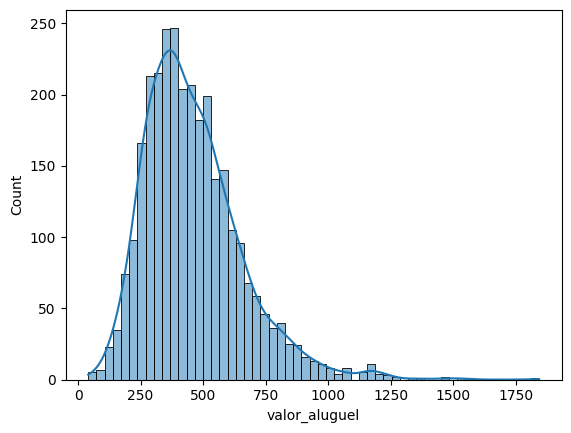

In [16]:
#Histograma
sns.histplot(data = df_dsa, x = "valor_aluguel", kde = True) #kde= true para densidade

In [17]:
#Correlação entre as variáveis 
df_dsa.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


 Temos uma correlação (0,58) positiva entre a variável area_m2 e valor_aluguel. Ou seja, a medida que a área aumenta a valor_aluguel também aumenta. Analisando o r-pearson, vemos que a área tem a maior correlação com a nossa varável alvo.

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

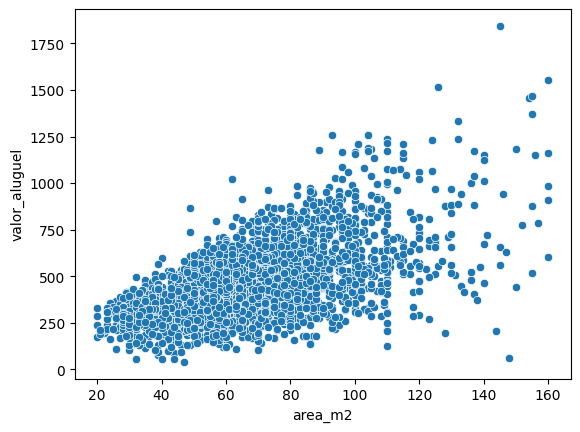

In [18]:
#Analisando a correlação das duas variáveis acima, através do gráfico de dispersão.
sns.scatterplot(data = df_dsa, x = "area_m2", y = "valor_aluguel")

## Regressão Linear Simples 
Vai modelar a relação entre uma variável dependente e uma ou mais variáveis indepentes.

## Construção do Modelo OLS (Ordinary Least Squares) com Statsmodels em Python 

In [22]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [23]:
#Variável dependente 
y = df_dsa["valor_aluguel"]

In [31]:
#Variável independente
x = df_dsa["area_m2"]

In [34]:
#Statsmodels requer adição de uma constante à variável independente 
x = sm.add_constant(x) 

In [35]:
#Criando o modelo
modelo = sm.OLS(y,x)

In [36]:
#Treinamento do modelo
resultado = modelo.fit()

In [37]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          6.84e-275
Time:                        09:38:19   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

Quando o valor de p < 0,05, isso indica que a variável é relevante para explicar a variável alvo, ou seja, o valor do imóvel ajuda a entender o valor do aluguel. Quanto maior for o R-quadrado (r^2), melhor será a explicação da variável alvo. Ele indica que o modelo explica o comportamento da variável alvo. Neste caso, como o R-quadrado é 0,342, podemos dizer que a variável "área" por si só não responde sozinha à variação de preço.

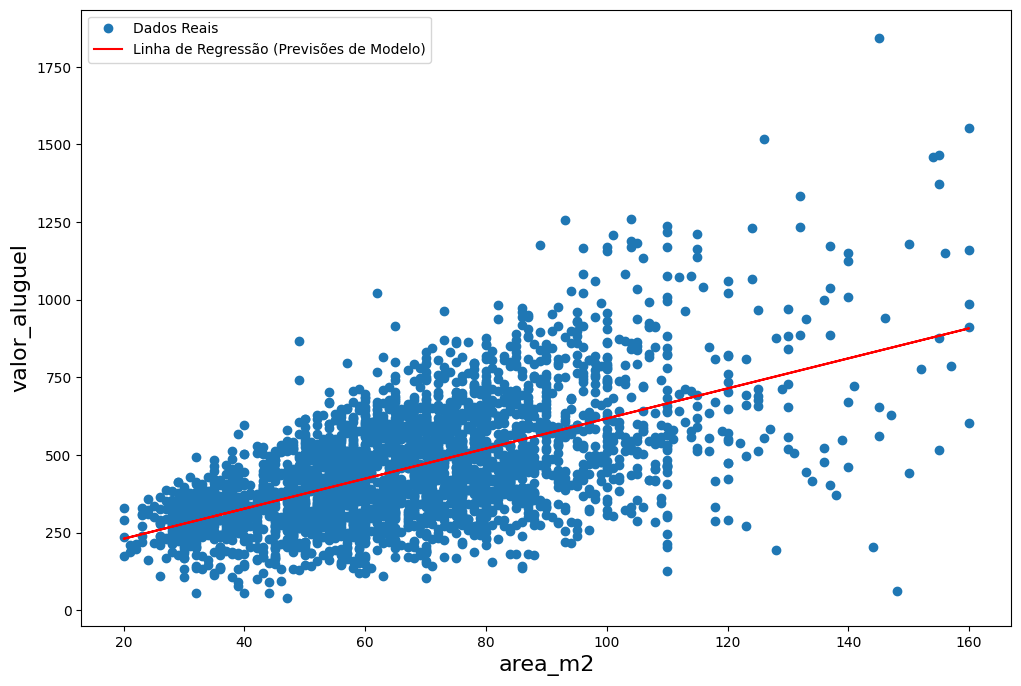

In [38]:
#Plot

plt.figure(figsize = (12,8))
plt.xlabel("area_m2", size =16)
plt.ylabel("valor_aluguel", size=16)
plt.plot(x["area_m2"],y,"o", label = "Dados Reais")
plt.plot(x["area_m2"], resultado.fittedvalues,"r-", label = "Linha de Regressão (Previsões de Modelo)")
plt.legend(loc = "best")
plt.show()

## Conclusão
Existe uma correlação entre a área (m2) e o valor do aluguel. No entanto, apenas a variável "área" não é suficiente para explicar as variações do valor de aluguel, dado que o R-quadrado (r^2) foi de 0,34. Logo, é necessário adicionar mais variáveis de entrada para construir o modelo, tornando mais factível o entendimento dos fatores que influenciam o valor.